Frankfurt, den 15.03.2018<br><br>
Anonym<br>
Matrikelnummer: Anonym<br><br>
PsyMSc 4(Kog.): Praxismodul - Python für Psychologen<br>
Dr. Jona Sassenhagen<br>
Wintersemester 2017/2018<br>
Goethe Universität Frankfurt am Main<br>

## Erleichtern selbstrelevante Informationen das Wiedererkennen?

### Einleitung

In einer Umgebung, in der uns eine unzählige Menge an Informationen gleichzeitig erreicht, ist es wichtig, relevante Informationen zu selektieren und irrelevante Informationen auszublenden. Ein Instrument, das uns hilft, Informationen zu filtern, ist die Selbstrelevanz. Um selbstrelevante Stimuli von vertrauten und ueberlernten Stimuli abzugrenzen, haben Sui, He und Humphreys (2012) ein Paradigma entworfen, in welchem geometrische Formen mit dem Selbst, einer vertrauten Person und einem neutralen Gegenstand assoziiert werden. Den Effekt, dass Personen in einem anschließenden Wiedererkennungstest die mit dem Selbst assoziierten Kombinationen schneller und fehlerfreier identifizieren als die anderen Kombinationen, nennen sie Selbstpriorisierungseffekt. Dieser soll in diesem Experiment erneut untersucht werden.<br><br>
### Methode

In diesem Experiment gibt es zwei unabhaengige Variablen Label (Ich vs. Stuhl) und Kongruenz (Inkongruenz vs. Kongruenz). Die abhaengigen Variablen stellen Reaktionszeit und Fehlerfreiheit dar.<br>
Zu Beginn des Experiments lernten die Versuchspersonen folgende Assoziationen: 
- "Ich" gehoert zu Dreieck 
- "Stuhl" gehoert zu Kreis

Anschließend wurden ihnen in jedem Durchgang gleichzeitig ein Label (Ich oder Stuhl) und eine Form (Dreieck oder Kreis) gezeigt. Die Versuchspersonen mussten durch Tastenklick entscheiden, ob sie diese Kombination gelernt hatten (Taste "m") oder nicht (Taste "c"). Die Versuchspersonen durchliefen 4 Bloecke, die aus jeweils 10 Durchgaengen bestanden. <br><br>
Die Hypothese dieses Experiments lautet, dass Personen von Selbstrelevanz profitieren und somit schneller bzw. akkurater auf die gelernten Kombinationen mit dem Label "Ich" reagieren als auf die gelernten Kombinationen mit dem Label "Stuhl".<br><br>
Hierfuer wurden in den Analysen lediglich die kongruenten Durchgaenge betrachtet, also diejenigen Durchgaenge, bei denen es sich um die Präsentation vorher gelernter Kombinationen handelte, da der Selbstpriorisierungseffekt in vorherigen Studien nur in kongruenten Durchgaengen gefunden wurde.

### Analyse und Ergebnisse

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from scipy.stats import ttest_rel
from scipy import stats
from scipy.stats import wilcoxon
from glob import glob

all_dfs = list()
for ii, file in enumerate(glob("./csv/*")):  
    if file.endswith(".csv"): 
        try:
            df = pd.read_csv(file)
            df["subj"] = ii 
            all_dfs.append(df)
        except Exception:
            pass
df = pd.concat(all_dfs)

In [4]:
data = df.query("congruence == True")

In [5]:
number_dg = len(data)
number_subj = len(data["subj"].unique())
print("In diesem Experiment wurden die Daten aus {} Durchgaengen von insgesamt {} Versuchspersonen analysiert.".format(number_dg, number_subj))

In diesem Experiment wurden die Daten aus 115 Durchgaengen von insgesamt 6 Versuchspersonen analysiert.


In [6]:
data.head(10)

,block,trial,congruence,label,correct,rt,subj
0,1,0,True,Stuhl,False,0.727463,0
1,1,1,True,Stuhl,True,0.724633,0
3,1,3,True,Stuhl,True,1.258269,0
4,1,4,True,Stuhl,True,0.743416,0
7,1,7,True,Ich,True,0.589521,0
8,1,8,True,Ich,True,0.644934,0
9,1,9,True,Stuhl,True,0.665582,0
13,2,3,True,Stuhl,True,1.123118,0
15,2,5,True,Ich,True,0.675999,0
16,2,6,True,Ich,True,0.601578,0


##### 1. Ausreißeranalyse
Boxplot der Reaktionszeiten:

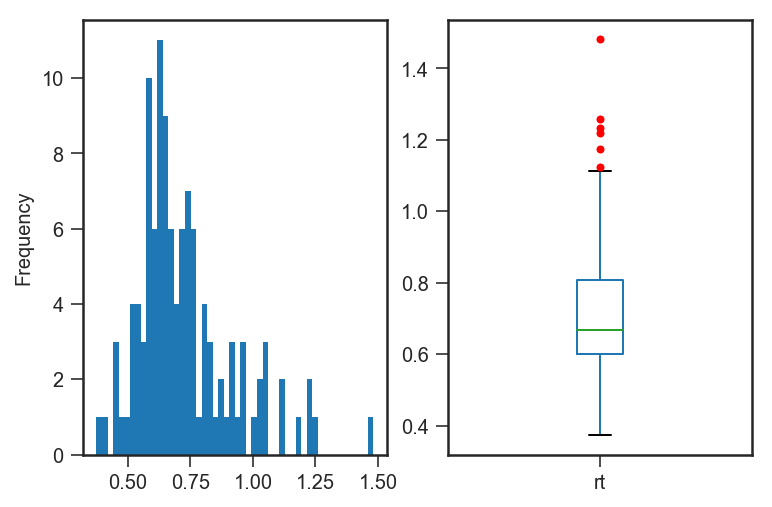

In [7]:
fig, axs = mpl.pyplot.subplots(1,2)

data["rt"].plot(kind="hist", bins=50, ax=axs[0])
data["rt"].plot(kind="box", sym='r.', ax=axs[1])

Da keine der Reaktionszeiten außergewöhnlich hervorstechen, werden alle Daten in die weiteren Analysen einbezogen. Diese Vorgehensweise wird auch dadurch unterstuetzt, dass bei Sue et al. (2012) lediglich Reaktionszeiten, die kleiner als 0.2 ms sind, ausgeschlossen werden.

##### 2. Deskriptive Analysen

Histogramm der Reaktionszeiten:

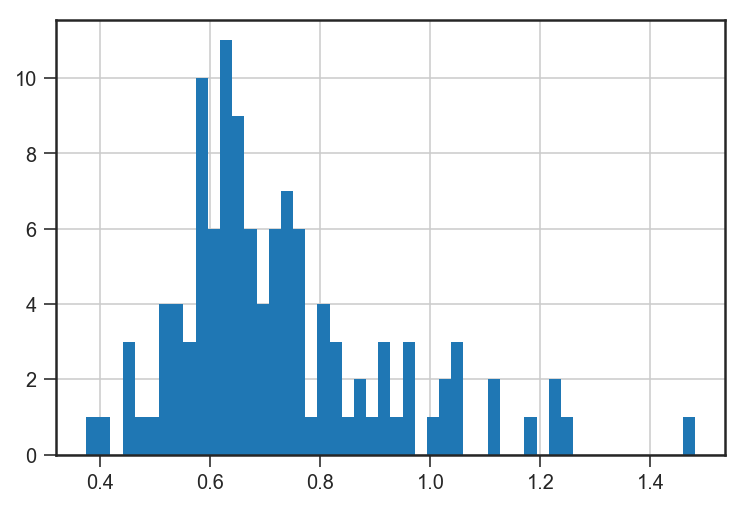

In [8]:
data["rt"].hist(bins=50)

Mittlere Reaktionszeiten pro Versuchsperson und Label (Tabelle und Balkendiagramm):

In [9]:
data_agg_rt = data.groupby(["subj", "label"]).mean()["rt"].reset_index()
type(data_agg_rt)

pandas.core.frame.DataFrame

In [10]:
data_agg_rt.head(12)

,subj,label,rt
0,0,Ich,0.582419
1,0,Stuhl,0.833020
2,1,Ich,0.814928
3,1,Stuhl,0.740205
4,2,Ich,0.624374
5,2,Stuhl,0.648260
6,3,Ich,0.867362
7,3,Stuhl,0.972416
8,4,Ich,0.778624
9,4,Stuhl,0.762602


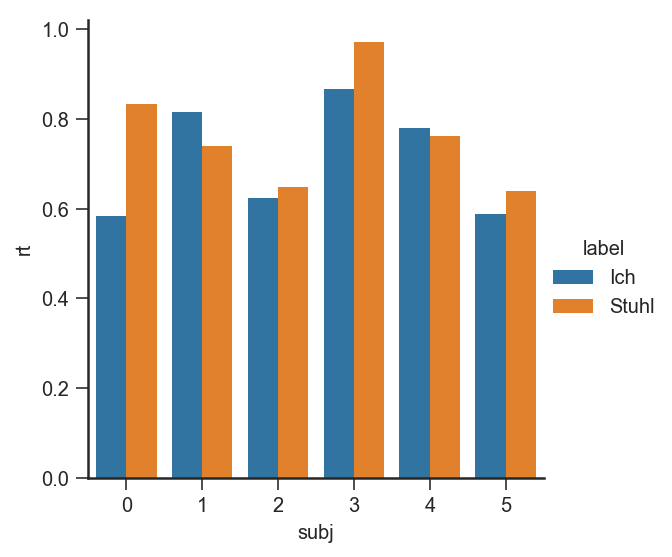

In [11]:
sns.factorplot(x="subj", y="rt", hue="label", data=data_agg_rt, kind="bar")

In [12]:
data.groupby(["label", "subj"]).std()["rt"]

label  subj
Ich    0       0.100150
       1       0.216589
       2       0.072796
       3       0.160702
       4       0.164814
       5       0.092170
Stuhl  0       0.230016
       1       0.147336
       2       0.130035
       3       0.299568
       4       0.212747
       5       0.115778
Name: rt, dtype: float64

Mittlere Fehlerfreiheit pro Versuchsperson und Label (Tabelle und Balkendiagramm):

In [13]:
data_agg_corr = data.groupby(["subj", "label"]).mean()["correct"].reset_index()
type(data_agg_corr)

pandas.core.frame.DataFrame

In [14]:
data_agg_corr.head(12)

,subj,label,correct
0,0,Ich,1.000000
1,0,Stuhl,0.700000
2,1,Ich,1.000000
3,1,Stuhl,0.928571
4,2,Ich,1.000000
5,2,Stuhl,0.818182
6,3,Ich,1.000000
7,3,Stuhl,0.857143
8,4,Ich,1.000000
9,4,Stuhl,0.909091


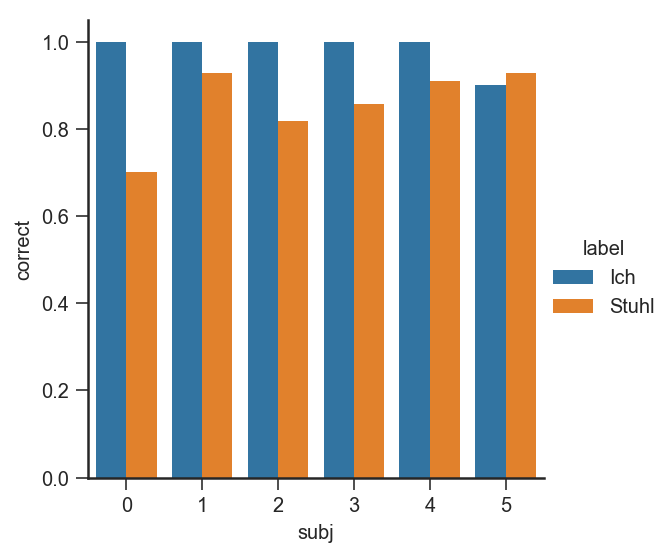

In [15]:
sns.factorplot(x="subj", y="correct", hue="label", data=data_agg_corr, kind="bar")

In [16]:
data.groupby(["label", "subj"]).std()["correct"]

label  subj
Ich    0       0.000000
       1       0.000000
       2       0.000000
       3       0.000000
       4       0.000000
       5       0.316228
Stuhl  0       0.483046
       1       0.267261
       2       0.404520
       3       0.377964
       4       0.301511
       5       0.267261
Name: correct, dtype: float64

Bei rein deskriptiver Betrachtung der Fehlerfreiheit zeigt sich, dass Personen weniger Fehler machen, wenn sie auf die Kombinationen mit dem Label "Ich" reagieren als auf die Kombinationen mit dem Label "Stuhl". 

##### 3. Signifikanzpruefung

In den folgenden Berechnungen wird geprueft, ob sich die abhaengigen Variablen Reaktionszeit und Fehlerfreiheit zwischen den beiden Stufen der unabhaengigen Variable Label (Ich vs. Stuhl) signifikant unterscheiden. 
Da die Daten messwiederholt sind, bietet sich hier ein t-Test für abhaengige Stichproben unter der Voraussetzung, dass die Daten der Stichprobe einer normalverteilten Grundgesamtheit entstammen, an. Die Voraussetzung der Normalverteilung laesst sich mit dem Kolmogorov-Smirnov-Test ueberpruefen.

**Kolmogorov-Smirnov-Test**: 

In [17]:
ich_rts = data.query("correct == True").query("label == 'Ich'").groupby("subj").mean()["rt"]
stuhl_rts = data.query("correct == True").query("label == 'Stuhl'").groupby("subj").mean()["rt"]

In [18]:
stats.kstest(ich_rts, "norm"), stats.kstest(stuhl_rts, "norm")

(KstestResult(statistic=0.7198577092061945, pvalue=0.0011292557174267248),
 KstestResult(statistic=0.7450462308667489, pvalue=0.0005972429744107721))

In [19]:
ich_acc = data.query("label == 'Ich'").groupby("subj").mean()["correct"]
stuhl_acc = data.query("label == 'Stuhl'").groupby("subj").mean()["correct"]

In [20]:
stats.kstest(ich_acc, "norm"), stats.kstest(stuhl_acc, "norm")

(KstestResult(statistic=0.8159398746532405, pvalue=7.778132139391047e-05),
 KstestResult(statistic=0.758036347776927, pvalue=0.0004233740002812514))

Laut Kolmogorov-Smirnov-Test sind Verteilungen mit einem *p*-Wert > 0.5 normalverteilt. Somit sind die Reaktionszeiten sowie die Fehlerfreiheit mit je *p* < .01 nicht normalverteilt. Die Voraussetzung der Normalverteiltheit der Daten fuer den t-Test ist somit nicht erfuellt.<br><br>
Eine Alternative zum t-Test fuer abhaengige Stichproben bei verletzter Normalverteilung der Daten ist der Wilcoxon-Test fuer abhaengige Stichproben.<br><br>
**Wilcoxon-Test für abhängige Stichproben**:

In [21]:
wilcoxon(ich_rts, stuhl_rts)

/Users/jona/miniconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=4.0, pvalue=0.17295491798842066)

In [22]:
Z, p = wilcoxon(ich_rts, stuhl_rts)
print("""Bei Analyse der Reaktionszeiten durch den Wilcoxon-Test zeigt sich, dass der Unterschied in den Mittelwerten zwischen "Ich" und "Stuhl" mit Z(N=6)={}, p={}""".format(Z, round(p,3)), "signifikant ist." if p < 0.05 else "nicht signifikant ist.")

Bei Analyse der Reaktionszeiten durch den Wilcoxon-Test zeigt sich, dass der Unterschied in den Mittelwerten zwischen "Ich" und "Stuhl" mit Z(N=6)=4.0, p=0.173 nicht signifikant ist.


/Users/jona/miniconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [23]:
wilcoxon(ich_acc, stuhl_acc)

/Users/jona/miniconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=1.0, pvalue=0.046399461870904594)

In [24]:
Z, p = wilcoxon(ich_acc, stuhl_acc)
print("""Bei Analyse der Fehlerfreiheit durch den Wilcoxon-Test zeigt sich, dass der Unterschied in den Mittelwerten zwischen "Ich" und "Stuhl" mit Z(N=6)={}, p={}""".format(Z, round(p,3)), "signifikant ist." if p < 0.05 else "nicht signifikant ist.")

Bei Analyse der Fehlerfreiheit durch den Wilcoxon-Test zeigt sich, dass der Unterschied in den Mittelwerten zwischen "Ich" und "Stuhl" mit Z(N=6)=1.0, p=0.046 signifikant ist.


/Users/jona/miniconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


**T-Test fuer abhaengige Stichproben**<br><br>
Auch wenn die Voraussetzung der Normalverteiltheit der Daten nicht erfuellt ist, sind im Folgenden die Signifikanzpruefungen durch den t-Test abgebildet. (Da wir im Seminar den t-Test behandelt hatten, wollte ich ihn urspruenglich in dieser Analyse rechnen. Auch wenn er – wie angedeutet – hier nicht aussagekraeftig ist, rechne ich ihn der Vollstaendigkeit halber trotzdem.) 

In [25]:
ttest_rel(ich_rts, stuhl_rts)

Ttest_relResult(statistic=-1.4527437459446837, pvalue=0.20602269297298376)

In [26]:
t, p = ttest_rel(ich_rts, stuhl_rts)
message = """Laut t-Test fuer abhaengige Stichproben ist die Mittelwertdifferenz der Reaktionszeiten zwischen "Ich" und "Stuhl" """
print(message, "signifikant." if p < 0.05 else "nicht signifikant.")

Laut t-Test fuer abhaengige Stichproben ist die Mittelwertdifferenz der Reaktionszeiten zwischen "Ich" und "Stuhl"  nicht signifikant.


In [27]:
ttest_rel(ich_acc, stuhl_acc)

Ttest_relResult(statistic=2.785605258868057, pvalue=0.038645072464515935)

In [28]:
t, p = ttest_rel(ich_acc, stuhl_acc)
message = """Laut t-Test fuer abhaengige Stichproben ist die Mittelwertdifferenz der Fehlerfreiheit zwischen "Ich" und "Stuhl" """
print(message, "signifikant." if p < 0.05 else "nicht signifikant.")

Laut t-Test fuer abhaengige Stichproben ist die Mittelwertdifferenz der Fehlerfreiheit zwischen "Ich" und "Stuhl"  signifikant.


#### Diskussion
Die Signifikanztestung durch den Wilcoxon-Test zeigt einen signifikanten Unterschied zwischen der mittleren Fehlerfreiheit je nach Auspraegung der unabhaengigen Variable Label. Dieses Ergebnis stuetzt die Vermutung durch die deskripitive Analyse, dass Personen bei Praesentation einer vorher gelernten Label-Form-Kombination mit dem Label "Ich" akkurater reagieren als auf eine vorher gelernte Kombination mit dem Label "Stuhl". Personen scheinen in ihren Reaktionen von der Verbindung mit dem Selbst zu profitieren. Diese Befunde stuetzen bisherige Befunde zum Selbstpriorisierungseffekt (Sui et al., 2012). In den Reaktionszeiten finden sich keine signifikanten Unterschiede.<br><br>
Allerdings ist die Stichprobengroesse von 6 Personen sehr gering, weshalb die Ergebnisse nur mit Vorsicht zu interpretieren sind.

#### Literatur

Schaefer, S., Wesslein, A. K., Spence, C., Wentura, D., & Frings, C. (2016). Self-prioritization in vision, audition, and touch. Experimental brain research, 234(8), 2141-2150.<br>
Sui, J., He, X., & Humphreys, G. W. (2012). Perceptual effects of social salience: evidence from self-prioritization effects on perceptual matching. Journal of Experimental Psychology: Human Perception and Performance, 38(5), 1105.